<center><h1> ML Lab 7: Support Vector Machines</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<p><b>Que</b> Try a pipeline of SVM parameters, C, Gamma, Kernel and report your observation Try SVM for Regression and tune the parameters. Choose an appropriate dataset for this. Explore the interactive SVM demo on https://dash-gallery.plotly.host/dash-svm and report your observations.</p>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

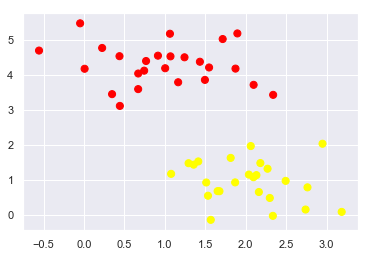

In [13]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn');

In [14]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    #create gird to evaluate model
    x=np.linspace(xlim[0], xlim[1], 30)
    y=np.linspace(ylim[0], xlim[1], 30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,P, colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolor='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

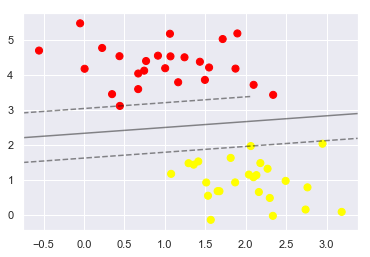

In [16]:
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

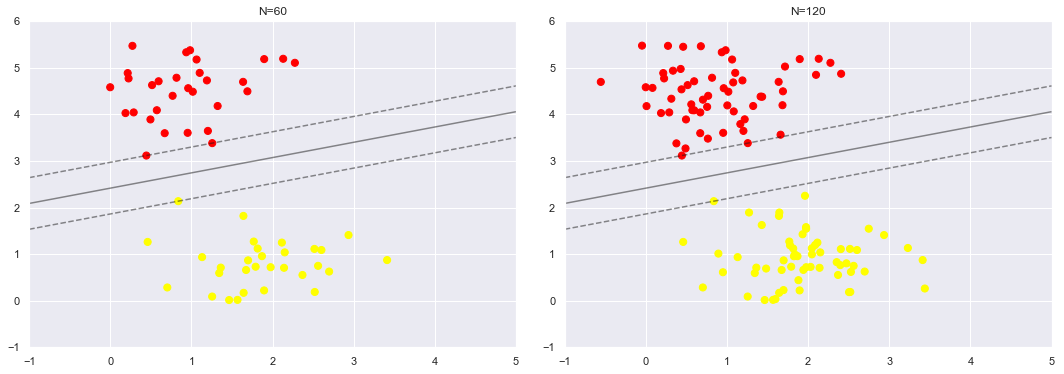

In [17]:
def plot_svm(N=10, ax=None):
    X,y=make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear', C=1E10)
    model.fit(X,y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model, ax)
    

fig, ax=plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

<h2> Kernel SVM</h2>

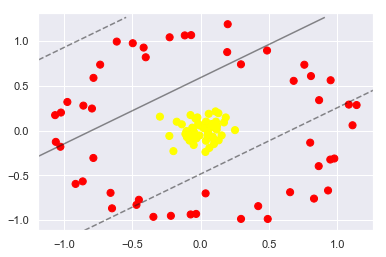

In [18]:
from sklearn.datasets.samples_generator import make_circles
X, y=make_circles(100, factor=0.1, noise=.1)

clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,-0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [19]:
r=np.exp(-(X**2).sum(1))

In [20]:
from mpl_toolkits import mplot3d
from ipywidgets import interact
from ipywidgets import fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), 
         X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [21]:
clf=SVC(kernel='rbf', C=1E5)
clf.fit(X, y)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

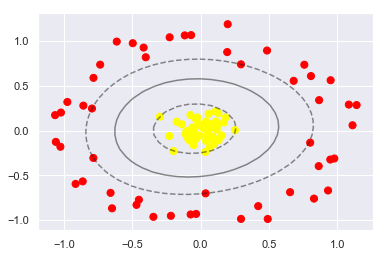

In [22]:
plt.scatter(X[:,-0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Method 1: Using SVC from Sklearn

#### Using different kernels and visualizing how they classify

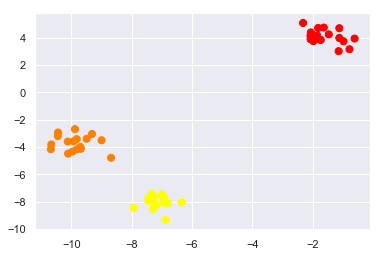

In [90]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50, centers=3, random_state=1, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn');

In [91]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=2, C=10).fit(X, y)

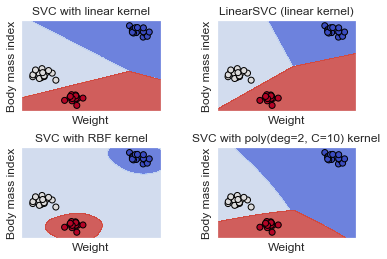

In [92]:
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with poly(deg=2, C=10) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm)
    plt.ylabel('Body mass index')
    plt.xlabel('Weight')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

## Method 2: Using GridSearchCV to tune the parameters

### By changing the kernel, C and gamma, we observe the performance changes.

In [93]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1, 1]}
svc = svm.SVC()

In [95]:
clf = GridSearchCV(svc, parameters, cv=2)

In [96]:
clf.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
clf.grid_scores_

[mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 1.00000, std: 0.00000, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'},
 mean: 0.84000, std: 0.16667, params: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'},
 mean: 0.82000, std: 0.14744, params: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'},
 mean: 1.00000, std: 0.00000, params: {'C': 0.001, 'gamma': 1, 'ker

In [98]:
print(clf.best_estimator_)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


<h2>Applying SVR on my Dataset</h2>

In [23]:
housing=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',sep='\s+')
housing.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
X=housing[['rm']].values
y=housing['medv'].values

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

## Method 1: Using SVR from Sklearn

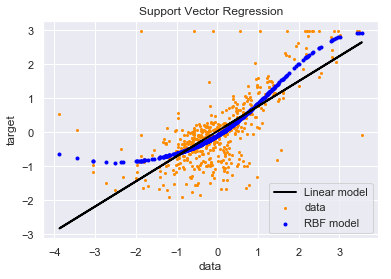

In [84]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=5)
y_rbf = svr_rbf.fit(X_std, y_std).predict(X_std)
y_lin = svr_lin.fit(X_std, y_std).predict(X_std)
y_poly = svr_poly.fit(X_std, y_std).predict(X_std)

# Look at the results
lw = 2
plt.scatter(X_std, y_std, color='darkorange', label='data',s=4)
plt.scatter(X_std, y_rbf, color='blue', lw=lw, label='RBF model',s=4)
plt.plot(X_std, y_lin, color='black', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

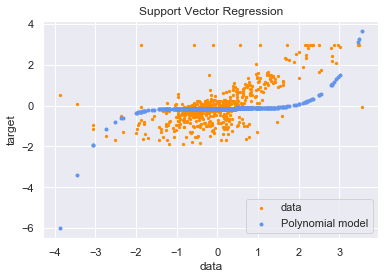

In [85]:
plt.scatter(X_std, y_std, color='darkorange', label='data',s=5)
plt.scatter(X_std, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model',s=4)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Method 2: Using GridSearchCV to tune the parameters

### By changing the kernel, C and gamma, we observe the performance changes.

In [ ]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
svr = SVR()

In [35]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svr, parameters, cv=2)
clf.fit(X_std, y_std)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
clf.grid_scores_

[mean: -0.00426, std: 0.09826, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'},
 mean: -0.16945, std: 0.13686, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: -0.16981, std: 0.13693, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'},
 mean: -0.00426, std: 0.09826, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'},
 mean: -0.16640, std: 0.13620, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: -0.16981, std: 0.13693, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'},
 mean: -0.00426, std: 0.09826, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'},
 mean: -0.14892, std: 0.13248, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: -0.16748, std: 0.13647, params: {'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'},
 mean: -0.00426, std: 0.09826, params: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'},
 mean: -0.13740, std: 0.12706, params: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'},
 mean: -0.00961, std: 0.15386, params: {'C': 0.001, 'gam

In [37]:
print(clf.best_estimator_)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


<h4>Plotting best Estimator</h4>

In [38]:
arush=clf.best_estimator_

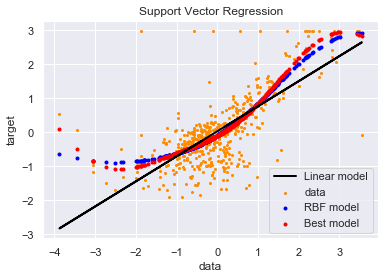

In [83]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=5)
y_rbf = svr_rbf.fit(X_std, y_std).predict(X_std)
y_lin = svr_lin.fit(X_std, y_std).predict(X_std)
y_poly = svr_poly.fit(X_std, y_std).predict(X_std)
y_arush=arush.fit(X_std, y_std).predict(X_std)

# Look at the results
lw = 2
plt.scatter(X_std, y_std, color='darkorange', label='data', s=4)
plt.scatter(X_std, y_rbf, color='blue', lw=lw, label='RBF model',s=4)
plt.plot(X_std, y_lin, color='black', lw=lw, label='Linear model')
plt.scatter(X_std, y_arush, color='red', lw=lw, label='Best model',s=4)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

<h2>Support Vector Machine (SVM) Explorer</h2>

<h4>I experimented with SVM Explorer, tried different combination. Here are my observations: </h4>

<li>Increasing gamma increases train and test accuracy</li>
<li>RBF is best among the different types of kernel for non linear data</li>
<li>Increasing noise decreases accuracy</li>
<li>Circle dataset has the least accuracy</li>